## Analysing Titanic dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
titanic_df = pd.read_csv('titanic_data.csv')

In [3]:
titanic_df.columns

Index([u'PassengerId', u'Survived', u'Pclass', u'Name', u'Sex', u'Age',
       u'SibSp', u'Parch', u'Ticket', u'Fare', u'Cabin', u'Embarked'],
      dtype='object')

In [4]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**VARIABLE DESCRIPTIONS:**
<pre> 
survival        Survival
                (0 = No; 1 = Yes)
pclass          Passenger Class
                (1 = 1st; 2 = 2nd; 3 = 3rd)
name            Name
sex             Sex
age             Age
sibsp           Number of Siblings/Spouses Aboard
parch           Number of Parents/Children Aboard
ticket          Ticket Number
fare            Passenger Fare
cabin           Cabin
embarked        Port of Embarkation
                (C = Cherbourg; Q = Queenstown; S = Southampton)

SPECIAL NOTES:
Pclass is a proxy for socio-economic status (SES)
 1st ~ Upper; 2nd ~ Middle; 3rd ~ Lower

Age is in Years; Fractional if Age less than One (1)
 If the Age is Estimated, it is in the form xx.5

With respect to the family relation variables (i.e. sibsp and parch)
some relations were ignored.  The following are the definitions used
for sibsp and parch.

Sibling:  Brother, Sister, Stepbrother, or Stepsister of Passenger Aboard Titanic
Spouse:   Husband or Wife of Passenger Aboard Titanic (Mistresses and Fiances Ignored)
Parent:   Mother or Father of Passenger Aboard Titanic
Child:    Son, Daughter, Stepson, or Stepdaughter of Passenger Aboard Titanic

Other family relatives excluded from this study include cousins,
nephews/nieces, aunts/uncles, and in-laws.  Some children travelled
only with a nanny, therefore parch=0 for them.  As well, some
travelled with very close friends or neighbors in a village, however,
the definitions do not support such relations.
</pre>

In [34]:
num_persons_survived = len(titanic_df.loc[titanic_df['Survived'] == 1])
print num_persons_survived

342


In [36]:
num_persons_drowned = len(titanic_df) - num_persons_survived
print num_persons_drowned

549


In [39]:
survived_df = titanic_df.loc[titanic_df['Survived'] == 1]
drowned_df = titanic_df.loc[titanic_df['Survived'] == 0]

In [43]:
survived_df['Age'][:5]

1    38.0
2    26.0
3    35.0
8    27.0
9    14.0
Name: Age, dtype: float64

In [49]:
# count the null values
print survived_df['Age'].isnull().sum()

52

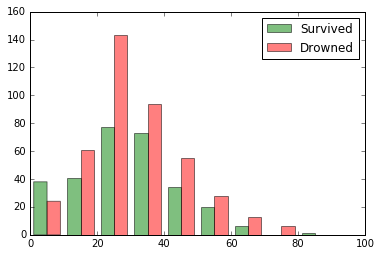

In [70]:
# plot hist after removing na
bins = range(0,101,10)
plt.hist([survived_df['Age'].dropna(), drowned_df['Age'].dropna()], bins, alpha=0.5,
         label=['Survived', 'Drowned'], color=['green', 'red'])
plt.legend(loc='upper right')

In [92]:
titanic_df.groupby('Sex')['Survived'].sum()

Sex
female    233
male      109
Name: Survived, dtype: int64

In [97]:
titanic_df.groupby('Survived', as_index=False)['PassengerId'].count()

,Survived,PassengerId
0,0,549
1,1,342


In [98]:
titanic_df.groupby(['Survived', 'Sex'], as_index=False)['PassengerId'].count()

,Survived,Sex,PassengerId
0,0,female,81
1,0,male,468
2,1,female,233
3,1,male,109


> A lot of females survived, which is expected. Females were made to evacuate the ship earlier.

In [101]:
survival_by_class = titanic_df.groupby(['Survived', 'Pclass'], as_index=False)['PassengerId'].count()
survival_by_class

,Survived,Pclass,PassengerId
0,0,1,80
1,0,2,97
2,0,3,372
3,1,1,136
4,1,2,87
5,1,3,119


In [111]:
def get_percentage(row):
    if row['Survived'] == 0:
        return row['PassengerId'] / num_persons_drowned
    else:
        return row['PassengerId'] / num_persons_survived
    
survival_by_class['percentage'] = survival_by_class.apply(get_percentage, axis='columns')
survival_by_class

,Survived,Pclass,PassengerId,percentage
0,0,1,80,0
1,0,2,97,0
2,0,3,372,0
3,1,1,136,0
4,1,2,87,0
5,1,3,119,0


> First class passenger's had higher chance of survival. This may be because the upper class passenger had rooms near the deck, while lower class passenger had rooms in the lower deck.